# Monte Carlo simulation of stock prices
In this work book I demonstrated the performance of Monte Carlo simulation in three different ways:
 1. On a pseudo-random basis,with realization based on a code published on Wikipedia (with slight adjustments).
 2. On   a pseudo-random basis, with faster realization proposed by me.
 3. On an quasi-random basis (my original code).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import sobol_seq as sob
from scipy.stats import norm

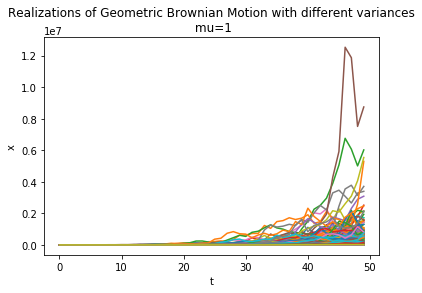

In [74]:
#20,000 simmulation, PSEDO RANDOM, by loop (base on wikipedya)

mu=1
n=50
dt=0.1
x0=100
sigma=1
x=pd.DataFrame()
np.random.seed(1)

t0=time.clock()
for i in np.arange(1,20000,1):
    step=np.exp((mu-sigma**2/2)*dt)*np.exp(sigma*np.random.normal(0,np.sqrt(dt),(1,n)))
    temp=pd.DataFrame(x0*step.cumprod())
    x=pd.concat([x,temp],axis=1)

#x.columns=np.arange(1,50,1)
plt.plot(x)
#plt.legend(x.columns)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Realizations of Geometric Brownian Motion with different variances\n mu=1')
plt.show
t1=time.clock()

In [81]:
t1-t0


169.8608122999999

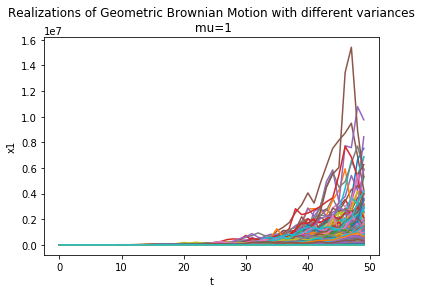

In [294]:
#100,000 simmulation, PSEDO RANDOM, by metrix
t0=time.clock()
temp1=pd.DataFrame(np.exp((mu-sigma**2/2)*dt)*np.exp(sigma*np.random.normal(0,np.sqrt(dt),(50,100000))))
x1=x0*temp1.cumprod()
t1=time.clock()
#x.columns=np.arange(1,50,1)
plt.plot(x1)
#plt.legend(x.columns)
plt.xlabel('t')
plt.ylabel('x1')
plt.title('Realizations of Geometric Brownian Motion with different variances\n mu=1')
plt.show
t2=time.clock()

In [295]:
t1-t0

0.31926690000000235

In [296]:
t2-t0

45.86400510000021

In [328]:
x.ix[[49]].mean(1)*np.exp(-5)

49    103.418062
dtype: float64

In [354]:
x1.ix[[49]].mean(1)*np.exp(-5)

49    99.993491
dtype: float64

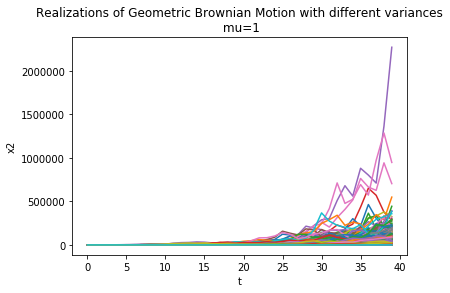

In [304]:
#10,000 simmulation, quasi-random, by metrix

t0=time.clock()
temp2=pd.DataFrame(np.exp((mu-sigma**2/2)*dt)*np.exp(sigma*norm.ppf(sob.i4_sobol_generate(40,10000), scale= np.sqrt(dt)))).T
x2=x0*temp2.cumprod()
t1=time.clock()
#x.columns=np.arange(1,50,1)
plt.plot(x2)
#plt.legend(x.columns)
plt.xlabel('t')
plt.ylabel('x2')
plt.title('Realizations of Geometric Brownian Motion with different variances\n mu=1')
plt.show
t2=time.clock()

In [309]:
t1-t0

1.0453468999994584

In [310]:
t2-t1

3.969679200000428

In [323]:
x2.ix[[39]].mean(1)*np.exp(-4)

39    99.219359
dtype: float64